# Project: Investigate The Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>The **The Movie Dataset** collected from *The Movie Database (TMDb)* contains about 10,000 data points of information on movies which include movie popularity rating, budget, taglines, keywords and more.

>This study will only seek to answer two important qustion which is on the mind of movie lovers.

## Research Question One:
>*What casts have higher popularity and rating?*

## Research Question Two:
>*What casts produced higher profit in movies?*

## Research Question Three:
>*What genre of movies have higher popularity and rating?*

## Research Question Four:
>*What genre have higher profit?*

## Research Question Five:
>*How does a movie runtime affects its Profit and Popularity?*

In [1]:
# First we have to import packages neccesary for four analysis, this include pandas, numpy, seaborn etc

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>Now lets work on our data.

In [2]:
# loading our data as pd and viewing the first few rows to have a view of our data
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# getting more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning
First data cleaning process will be to remove(drop) features that are not relevant to our study objectives. After that we deal with duplicates(if any) and missing values.

In [4]:
# features such as "imbd_id", "original_title", "homepage", "director", 
#"tagline", "budget", "revenue" will be droped as we shall be using only the _adj values of both

new_df = df.drop(["imdb_id", "original_title", "homepage", "director","tagline", "keywords","overview", "budget","revenue",], axis=1)

#view the new dataset new_df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   cast                  10790 non-null  object 
 3   runtime               10866 non-null  int64  
 4   genres                10843 non-null  object 
 5   production_companies  9836 non-null   object 
 6   release_date          10866 non-null  object 
 7   vote_count            10866 non-null  int64  
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
 10  budget_adj            10866 non-null  float64
 11  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1018.8+ KB


>We have some missing value recorded in the genre feature. It is also noticed that the dataset now has 12 colunms after dropping 9 features that would not be used in the study.

In [5]:
#checking for duplicate values
new_df.duplicated().sum()

1

>there is 1 duplicate values in the study

In [6]:
# lets veiw the duplicate value

new_df[new_df.duplicated()]

,id,popularity,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [7]:
#now lets drop the duplicated value

new_df.drop_duplicates(inplace=True)

In [8]:
#Just for confirmation lets check the data for duplicates again
new_df.duplicated().sum()

0

>Now we have Zero (0) duplicate(s) present in our new_df dataset.

>Now lets check for missing values

In [9]:
#Checking for missing values or nan
new_df.isnull().sum()

id                         0
popularity                 0
cast                      76
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>Our study finds 23 missing values for the genre, 76 for cast and 1030 for Production_companies. It will be great to convert these missing values to unknown

In [10]:
#replacing missing vaues with "unknown" and checking again for missing values

new_df.fillna("unknown", inplace=True)
new_df.isnull().sum()

id                      0
popularity              0
cast                    0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

>We have successfully treated the null values in our study. Next we should create a feature called profit which is a result of the subtraction of budgets from revenues

In [11]:
new_df["profit"] = new_df["revenue_adj"] - new_df["budget_adj"]

new_df.head()

,id,popularity,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


>This table shows the addition of a new column called profit.

<a id='eda'></a>
## Exploratory Data Analysis

>Now let's explore insights from our data

### Research Question One:
>**What casts have higher popularity and rating?**

In [12]:
# First step will be to describe our cleaned data to understand better what lies in the data
new_df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,3.381911e+07
std,92134.091971,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,1.252194e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,1.293091e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


> From our description of the data, this movie data was collected for movies released from year 1960 to 2015.
The movie with highest popularity index is 32.98, highest movie runtime 900minutes, movie with highest vote counthad 9767 while the movie with the most profit had *USD2,750,137,000* in profit.

>While there are movies with zero(0) runtime, Budget, revenue and our calculated profit. It should be noted that these values were accounted for and or are probabaly not given.

>now lets plot our data and have a general overview of the data visual

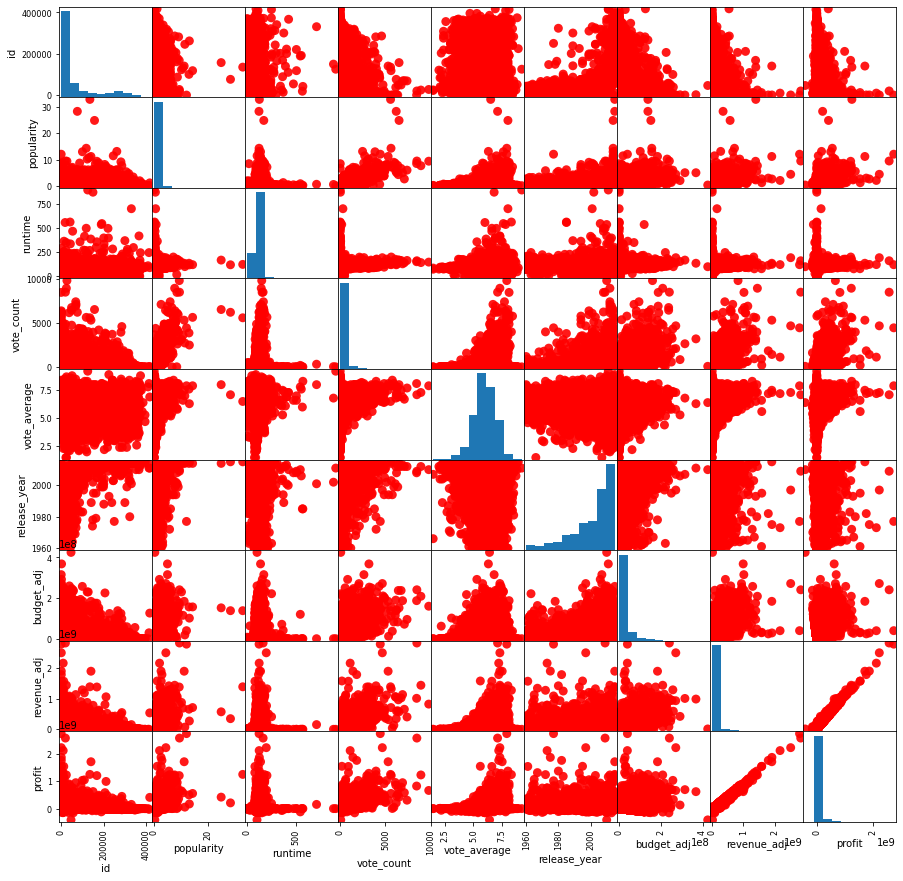

In [13]:
pd.plotting.scatter_matrix(new_df, s=80, alpha = 0.9, figsize= (15,15), grid=True, marker="T", color="red");

> From the scatter plot above it is evident that as profit increases revenue_adj increaases as well. This is a somewhat perfect corelations between variables.

>Now lets answer our research question. First it should be noted that the cast feature have more than one name seperated by |. It will make a lot more sense to explode these casts seperately.

In [14]:
#Now we will call a new varable name for cast data, split the cast by | and show some of it

cast_df = new_df.assign(cast=new_df.cast.str.split('|')).explode('cast')
cast_df.head()

,id,popularity,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Chris Pratt,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Bryce Dallas Howard,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Irrfan Khan,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Vincent D'Onofrio,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Nick Robinson,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


>Each cast now have their seperate row which we can use to get insight on each cast.

In [15]:
#Now lets group a data called cast_pp_df where pp == popularity and profit. After that weview the data.
cast_pp_df=cast_df.groupby(['cast'],as_index=False)['popularity', 'profit'].mean()
cast_pp_df.head()


<ipython-input-15-a0c881637410>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cast_pp_df=cast_df.groupby(['cast'],as_index=False)['popularity', 'profit'].mean()


,cast,popularity,profit
0,Larry Mullen Jr.,0.229679,0.000000e+00
1,Nicole MuÃ±oz,0.219441,0.000000e+00
2,Therese Giehse,0.451933,0.000000e+00
3,"""Weird Al"" Yankovic",0.137632,-8.794925e+06
4,50 Cent,0.958395,6.512801e+06


In [16]:
#Sorting cast by popularity for top 10
cast_pp_df.sort_values(by=['popularity'], ascending = False).head(10)

,cast,popularity,profit
9429,Josh Helman,28.419936,2.101614e+08
3898,Daisy Ridley,11.173104,1.718723e+09
7182,Hugh Keays-Byrne,10.211471,1.698050e+08
4037,Daniel Henney,8.691294,4.486685e+08
15889,Ryan Potter,8.691294,4.486685e+08
2344,Brian Dobson,8.411577,0.000000e+00
6569,Gloria Foster,7.753899,5.242984e+08
1229,Ansel Elgort,7.703183,2.202190e+08
2069,Blake Cooper,7.137273,2.895172e+08
10341,Ki Hong Lee,7.137273,2.895172e+08


>The most popular cast according to the above table is Josh Helman with 28.42 popularity index score.

In [17]:
#sorting cast by popularity by last 10
cast_pp_df.sort_values(by=['popularity'], ascending = False).tail(10)

,cast,popularity,profit
10464,Kochi,0.001117,3.653890e+06
11620,Mamuni,0.001117,3.653890e+06
1577,Avijit,0.001117,3.653890e+06
17446,Tara Sharma,0.001115,0.000000e+00
13436,Navin Nischol,0.001115,0.000000e+00
874,Andrea Bowen,0.000620,0.000000e+00
13155,Molly Tarlov,0.000620,0.000000e+00
12687,Michael J. Willett,0.000620,0.000000e+00
6293,Genie Francis,0.000065,0.000000e+00
14539,Philip Casnoff,0.000065,0.000000e+00


> The spot for casts with least popularity is share by Genie Francis and Philip Casnoff.

In [18]:
#now lets define a function for the plot
def top10(value1,value2,order):
    result=cast_pp_df.sort_values(value1, ascending = order).head(10)
    pl=sns.barplot(y=value2,x=value1,data=result)
    title=plt.title ("Top 10 {}".format(value2))
    yl=plt.ylabel("{}".format(value2))
    xl=plt.xlabel("{}".format(value1))
    return result,pl,title,yl,xl

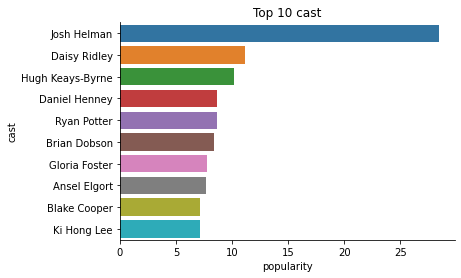

In [19]:
#Now lets plot the graph for top 10 cast by popularity
top10('popularity','cast', False)
sns.despine()
plt.show()

>Just like in the table for most popular cast early. This plot shows the visualisation for it. The plot actually makes it easy for one to read the difference clearly as Josh Helman was seen to me more than twice as popular than the cast following closely Daisy Ridley.

# Research Question Two
>What casts produced higher profit in movies?

In [20]:
#sorting cast for by profit
cast_pp_df.sort_values(by=['profit'], ascending = False).head(10)

,cast,popularity,profit
15401,Robert MacNaughton,2.900556,1.767968e+09
3898,Daisy Ridley,11.173104,1.718723e+09
7453,J. Pat O'Malley,2.631987,1.545635e+09
12015,Martha Wentworth,2.631987,1.545635e+09
1918,Betty Lou Gerson,2.631987,1.545635e+09
1826,Ben Wright,2.631987,1.545635e+09
11321,Louis Prima,2.550704,1.319404e+09
2122,Bob Peck,2.204926,1.293767e+09
15168,Richard S. Castellano,5.738034,1.246626e+09
8028,Jason Miller,1.264860,1.096582e+09


> One would be expecting the most popular cast would yeild greater profits, but from our study, Robert MacNaughton.

In [21]:
cast_pp_df.sort_values(by=['profit'], ascending = False).tail(10)

,cast,popularity,profit
8702,Joan Copeland,1.653031,-1.185350e+08
18209,Ulla Bergryd,0.533292,-1.209243e+08
9455,Joshua Fardon,0.999866,-1.222614e+08
4653,Dennis StorhÃ¸i,1.189386,-1.286813e+08
18488,Vladimir Kulich,1.189386,-1.286813e+08
4071,Daniel Southern,1.189386,-1.286813e+08
5450,Emilio EchevarrÃ­a,0.948560,-1.375868e+08
3822,Cristina Contes,0.642475,-1.500000e+08
7943,Jang Dong-gun,0.208412,-2.069562e+08
17678,Ti Lung,0.250540,-4.139124e+08


>No company likes making losses and in some cases it is inevitable that business would have a low turnover. Ti Lung would had the least profit by cast resulting in a loss of over 413,912,400 USD

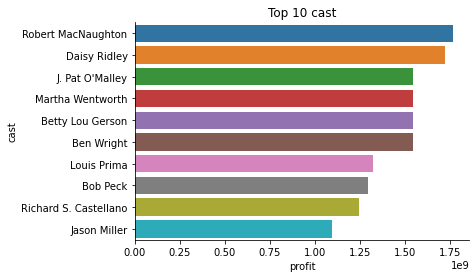

In [22]:
#Top 10 cast by profit generated
top10('profit','cast', False)
sns.despine()
plt.show()

>We can note that popularity of a movie cast does not equate to profit generated by a cast. The 10 most popular cast are no where to be found in the Profit chat.

## Research Question Three:
>*What genre of movies have higher popularity and rating?*

In [23]:
#splitting the genres differently
genres_df = new_df.assign(genres=new_df.genres.str.split('|')).explode('genres')
genres_df.head()

,id,popularity,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


>we have been able to split the genres differently. Lets get insight from our genre feature now.

In [24]:
#Now lets group a data called genres_pp_df where pp == popularity and profit. After that weview the data.
genres_pp_df=genres_df.groupby(['genres'],as_index=False)['popularity', 'profit'].mean()
genres_pp_df.head()

<ipython-input-24-8c70dc282104>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genres_pp_df=genres_df.groupby(['genres'],as_index=False)['popularity', 'profit'].mean()


,genres,popularity,profit
0,Action,0.926274,5.879816e+07
1,Adventure,1.154259,9.773789e+07
2,Animation,0.852182,5.996078e+07
3,Comedy,0.592607,3.197669e+07
4,Crime,0.744930,3.510290e+07


>This is the new table for popularity and profit groped by genres

In [25]:
#Top 10 genre by popularity index
genres_pp_df.sort_values(by=['popularity'], ascending = False).head(10)

,genres,popularity,profit
1,Adventure,1.154259,9.773789e+07
15,Science Fiction,1.001548,5.745413e+07
8,Fantasy,0.992840,7.380484e+07
0,Action,0.926274,5.879816e+07
2,Animation,0.852182,5.996078e+07
7,Family,0.786668,6.081282e+07
4,Crime,0.744930,3.510290e+07
17,Thriller,0.741563,3.460314e+07
18,War,0.727683,4.105605e+07
13,Mystery,0.690012,3.140699e+07


>The table above shows tha Adventure genre as the most popular next to Science Fiction

In [26]:
#Defining a function for the genres plot
def gtop10(value1,value2,order):
    result1=genres_pp_df.sort_values(value1, ascending = order).head(10)
    pl=sns.barplot(y=value2,x=value1,data=result1)
    title=plt.title ("Top 10 {}".format(value2))
    yl=plt.ylabel("{}".format(value2))
    xl=plt.xlabel("{}".format(value1))
    return result1,pl,title,yl,xl

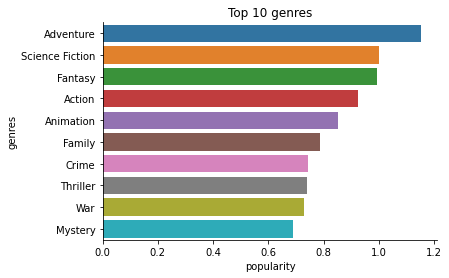

In [27]:
#plot for top 10 genres by popularity index
gtop10('popularity','genres', False)
sns.despine()
plt.show()

> Movies of genre "Adventure" had the highest popularity index

## Research Question Four:
>*What genre has higher profit?*

In [28]:
#sorting the genres by top 10 profit
genres_pp_df.sort_values(by=['profit'], ascending = False).head(10)

,genres,popularity,profit
1,Adventure,1.154259,9.773789e+07
8,Fantasy,0.992840,7.380484e+07
7,Family,0.786668,6.081282e+07
2,Animation,0.852182,5.996078e+07
0,Action,0.926274,5.879816e+07
15,Science Fiction,1.001548,5.745413e+07
18,War,0.727683,4.105605e+07
4,Crime,0.744930,3.510290e+07
17,Thriller,0.741563,3.460314e+07
12,Music,0.487321,3.366706e+07


> Of the top 10 genres by profit, we have Adventure again at the top of the list.

>PS: No wonder you find more adventure movies everywhere. I love adventure too but my vote is not in this data. And maybe we can get a data for the entire world to check how much the world loves adventure movies..

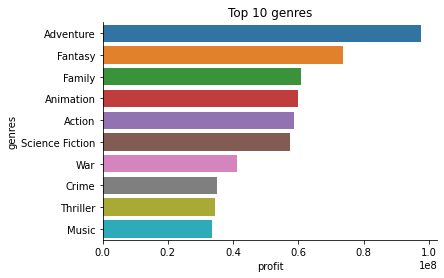

In [29]:
#plot for top 10 genres by profit
gtop10('profit','genres', False)
sns.despine()
plt.show()

> Adventure movies won this round. It came first for popularity and in profits. 
PS: This should speak to production companies in the region on their next movie to produce

## Research Question Five:
>*How does a movie runtime affects its Profit and Popularity?*

>In this section we shall explore the data using the scatter plot

In [30]:
#Now lets define a function to plot the runtime data for popularity and profit
def movie_runtime(value1,value2,order):
    result=new_df
    pl=sns.scatterplot(y=value2,x=value1,data=result, color="red", ec="black")
    title=plt.title ("Top 10 {}".format(value2))
    yl=plt.ylabel("{}".format(value2))
    xl=plt.xlabel("{}".format(value1))
    return result,pl,title,yl,xl

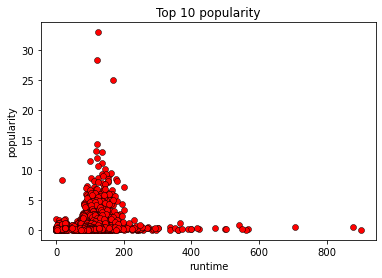

In [31]:
#Movie runtime by popularity
movie_runtime("runtime","popularity", False)
plt.show()

>There seem to be a huge cluster of points around the 150-200 runtime minutes.

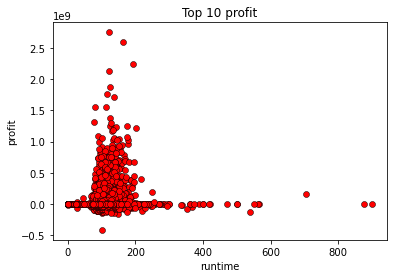

In [32]:
#movie runtime by profit
movie_runtime("runtime","profit", False)
plt.show()

>There also seem to be a huge cluster of points around the 150-200 runtime minutes. But from this plot their are a large number of movies witin the zero(0) profit zone. This will be our limitation. As we as to advice the stakeholders to populate the movies data for revenue and budget that were initially zero(0).

<a id='conclusions'></a>
## Conclusions
>Cast with higher popularity by sum distance is Josh Helman with Popularity index of 28.41 followed by Daisy Ridley 11.17 and Hugh Keays-Bryme 10.21.
The study observed a joint low popularity score between Genie Francis and Philip Casnoff with 0.000065.

>The top three cast with higher profits are Robert MacNaughton, Daisy Ridley and Betty Lou Gerson. Interestingly Daisy Ridley was also amongst the top three most popular cast.
Cristina Contes, Jang Dong-gun, and Ti Lung were the least cast with a loss of over 1.5million USD.

>The most popular movies from our study are Adventure closely followed by Science Fiction, Fantasy and Action. While the least popular movies are found in the Documentary Genre.

>The genre of movies with higher profit are Adventure movies next to Fantasy and family.

>The plots show a large cluster around movies within the 150 – 200 minutes runtime for both popularity and profits. This suggest that movies with shorter runtime will likely produce higher popularity index and higher profits.


## Limitation
>It is fair to note that we had movies with a runtime of zero(0), budget of zero(0) and revenue  of zero(0). Removinng this zero data would have reduced the number of data to work with by more than half.